In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
data = arff.loadarff('5year.arff')
df = pd.DataFrame(data[0]).dropna()
df['class'] = df['class'].str.decode("utf-8")
df = df.reset_index(drop=True)
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.520,0.34204,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,0.048179,0.55041,0.10765,1.2437,-22.959,0.00000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
2,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0
3,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0
4,0.125040,0.35440,0.31419,2.7127,17.942,0.30575,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0


## Question1

In [3]:
X, y = df.drop(['class'], axis = 1), df['class']

In [4]:
clf = LogisticRegression(C=1.0).fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
# accuracy score
score = clf.score(X,y)
print("The accuracy score is: ",score)

The accuracy score is:  0.9663477400197954


In [6]:
predicted_q1=clf.predict(X)

In [7]:
def calculate_matrice_val(y, y_pred):

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(y)):
        if y[i] == '1' and y_pred[i] == '1':
            tp += 1
        if y[i] == '0' and y_pred[i] == '0':
            tn += 1
        if y[i] == '0' and y_pred[i] == '1':
            fp += 1
        if y[i] == '1' and y_pred[i] == '0':
            fn += 1
    return tp,tn,fp,fn

In [8]:
tp_1, tn_1, fp_1, fn_1 = calculate_matrice_val(y, predicted_q1)
tpr_1 = tp_1/(tp_1+fn_1)
tnr_1 = tn_1/(tn_1+fp_1)

In [9]:
# balanced error rate
BER_1 = 1-1/2*(tpr_1+tnr_1)
print("The BER score is: ",BER_1)

The BER score is:  0.4905374918830625


## Question2

In [10]:
clf_q2 = LogisticRegression(C=1.0, class_weight='balanced').fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
pred_q2 = clf_q2.predict(X)

In [12]:
# accuracy score
score_2 = clf_q2.score(X,y)
print("The accuracy score is: ",score_2)

The accuracy score is:  0.7815902342461234


In [13]:
# balanced error rate
tp_2, tn_2, fp_2, fn_2 = calculate_matrice_val(y, pred_q2)
tpr_2 = tp_2/(tp_2+fn_2)
tnr_2 = tn_2/(tn_2+fp_2)

BER_2 = 1-1/2*(tpr_2+tnr_2)
print("The BER score is: ",BER_2)

The BER score is:  0.2123641877372322


## Question3

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, fbeta_score

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= 0.5)

In [28]:
clf_q3 = LogisticRegression(C=1.0, class_weight='balanced').fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
# accuracy score
score_trainq3 = clf_q3.score(x_train,y_train)
score_valq3 = clf_q3.score(x_val,y_val)
score_testq3 = clf_q3.score(x_test,y_test)

print("The accuracy score for train is: ",score_trainq3)
print("The accuracy score for validation is: ",score_valq3)
print("The accuracy score for test is: ",score_testq3)

The accuracy score for train is:  0.7735973597359735
The accuracy score for validation is:  0.7612137203166227
The accuracy score for test is:  0.7783641160949868


In [30]:
# BER score
ber_train = 1 - balanced_accuracy_score(y_train,clf_q3.predict(x_train))
ber_val = 1 - balanced_accuracy_score(y_val,clf_q3.predict(x_val))
ber_test = 1 - balanced_accuracy_score(y_test,clf_q3.predict(x_test))

print("The BER score for train is: ",ber_train)
print("The BER score for validation is: ",ber_val)
print("The BER score for test is: ",ber_test)

The BER score for train is:  0.23119551681195516
The BER score for validation is:  0.22842354333037562
The BER score for test is:  0.2756584922797457


## Question 4

In [31]:
import numpy as np

In [32]:
c_range = 10.00 ** np.arange(-4,5)
c_len = len(c_range)
train_list = []
val_list = []
test_list = []

for i in c_range:
    clf_range = LogisticRegression(C=i, class_weight='balanced').fit(x_train, y_train)
    train_list.append(1 - balanced_accuracy_score(y_train,clf_range.predict(x_train)))
    val_list.append(1 - balanced_accuracy_score(y_val,clf_range.predict(x_val)))
    test_list.append(1 - balanced_accuracy_score(y_test,clf_range.predict(x_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteratio

In [33]:
for i in range(c_len):
    print("c is",c_range[i], "\n train Ber is" , train_list[i], "\n val Ber is" , val_list[i],"\n test Ber is" , test_list[i])

c is 0.0001 
 train Ber is 0.2413138231631382 
 val Ber is 0.22638272700384499 
 test Ber is 0.2749772933696639
c is 0.001 
 train Ber is 0.24508094645080947 
 val Ber is 0.23114463176574973 
 test Ber is 0.27770208900999094
c is 0.01 
 train Ber is 0.20308219178082187 
 val Ber is 0.22434191067731435 
 test Ber is 0.26816530426884655
c is 0.1 
 train Ber is 0.21731008717310085 
 val Ber is 0.22570245489500151 
 test Ber is 0.272252497729337
c is 1.0 
 train Ber is 0.23119551681195516 
 val Ber is 0.22842354333037562 
 test Ber is 0.2756584922797457
c is 10.0 
 train Ber is 0.22879825653798247 
 val Ber is 0.22706299911268846 
 test Ber is 0.2749772933696639
c is 100.0 
 train Ber is 0.20582191780821923 
 val Ber is 0.22570245489500151 
 test Ber is 0.27089009990917345
c is 1000.0 
 train Ber is 0.2166251556662515 
 val Ber is 0.22570245489500151 
 test Ber is 0.27157129881925524
c is 10000.0 
 train Ber is 0.2082191780821918 
 val Ber is 0.22706299911268846 
 test Ber is 0.27089009990

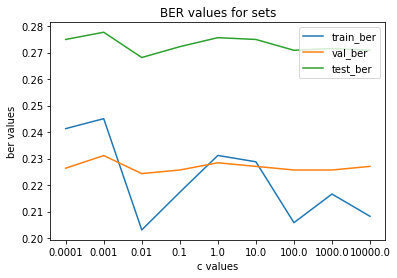

In [34]:
import matplotlib.pyplot as plt
plt.plot(train_list,label = 'train_ber')
plt.plot(val_list,label = 'val_ber')
plt.plot(test_list, label = 'test_ber')
plt.xticks(np.arange(c_len),c_range)
plt.xlabel("c values")
plt.ylabel("ber values")
plt.legend(loc='upper right')
plt.title("BER values for sets")
plt.show()

Based on both the graph report and data report, I would like to choose C=0.01. When C=0.01, the BER values seems relative low for train dataset, validation dataset and test dataset.

## Question 5

In [23]:
from sklearn.metrics import fbeta_score
clf_q5 = LogisticRegression(C=1.0, class_weight='balanced').fit(x_train, y_train)
fbeta_1 = fbeta_score(y_test.astype(int), clf_q5.predict(x_test).astype(int), beta=1)
print("beta is 1, fbeta is ", fbeta_1)

fbeta_2 = fbeta_score(y_test.astype(int), clf_q5.predict(x_test).astype(int), beta=0.1)
print("beta is 0.1, fbeta is ", fbeta_2)

fbeta_3 = fbeta_score(y_test.astype(int), clf_q5.predict(x_test).astype(int), beta=10)
print("beta is 10, fbeta is ", fbeta_3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


beta is 1, fbeta is  0.1504424778761062
beta is 0.1, fbeta is  0.08489912974683546
beta is 10, fbeta is  0.6598770176787087


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Question 7

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
print(pca.components_[0])

[ 3.24044850e-07 -1.47508010e-06  1.70422860e-06  9.08803137e-06
  3.20983885e-03  1.04978584e-06  3.73855537e-07  9.66448773e-06
 -6.81269158e-07  1.39672371e-06  3.03184244e-07  2.28015848e-06
 -7.04971460e-06  3.73361461e-07 -2.69519749e-03  1.91683997e-06
  1.06562764e-05  1.91765911e-07  7.70947330e-07  5.94937238e-05
 -1.69958332e-05  2.42674828e-07  7.20000572e-07  9.96785384e-07
  1.64311947e-06  1.67495118e-06  1.68930511e-05  4.62218089e-06
  4.34838857e-06 -3.06796428e-06  7.55304087e-07 -4.59555789e-04
  1.01969422e-05 -1.40896249e-06  2.23989481e-07 -9.18290082e-07
  1.90352395e-03  1.21699965e-06  3.09966162e-07  4.52674062e-06
  1.85158262e-06  5.02638839e-07  5.66846900e-05 -2.81203620e-06
 -3.50015492e-06  6.91534895e-06  8.84954604e-05  3.10511468e-07
  7.26786545e-07  7.62231133e-06 -1.22783816e-06 -1.21052148e-06
 -2.43936990e-06  4.59475948e-06  9.99989168e-01  3.11842955e-07
 -2.57288722e-07 -4.64905957e-07 -7.62228797e-07 -2.21932543e-04
 -1.64798250e-05 -4.43100

## Question 8

In [35]:
ran_N = np.arange(5,31,5)
vallst = []
testlst = []


for i in ran_N:
    
    new_pca = PCA(n_components = i)
    new_pca.fit(x_train)
    
    Xpca_train = np.matmul(x_train.to_numpy(), new_pca.components_.T)
    Xpca_valid = np.matmul(x_val.to_numpy(), new_pca.components_.T)
    Xpca_test = np.matmul(x_test.to_numpy(), new_pca.components_.T)
    
    clf_q8 = LogisticRegression(C=i, class_weight='balanced').fit(Xpca_train, y_train)
    
    vallst.append(1 - balanced_accuracy_score(y_val,clf_q8.predict(Xpca_valid)))
    testlst.append(1 - balanced_accuracy_score(y_test,clf_q8.predict(Xpca_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterat

In [36]:
for i in range(len(ran_N)):
    print("n is",ran_N[i], "\n validation Ber is" , vallst[i], "\n test Ber is" , testlst[i])

n is 5 
 validation Ber is 0.2821354628808046 
 test Ber is 0.2571525885558583
n is 10 
 validation Ber is 0.24540076900325358 
 test Ber is 0.26299954586739327
n is 15 
 validation Ber is 0.22431233362910385 
 test Ber is 0.31840372388737515
n is 20 
 validation Ber is 0.23318544809228037 
 test Ber is 0.2917234332425068
n is 25 
 validation Ber is 0.23930789707187228 
 test Ber is 0.2817892824704814
n is 30 
 validation Ber is 0.22434191067731435 
 test Ber is 0.2702089009990918


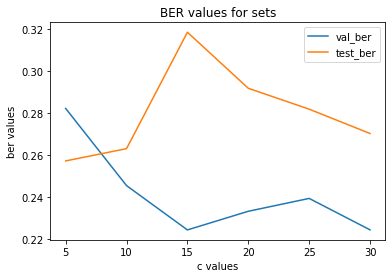

In [37]:
plt.plot(vallst,label = 'val_ber')
plt.plot(testlst, label = 'test_ber')
plt.xticks(range(len(ran_N)),ran_N)
plt.xlabel("c values")
plt.ylabel("ber values")
plt.legend(loc='upper right')
plt.title("BER values for sets")
plt.show()